# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [98]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [99]:
# Read the Mapbox API key
load_dotenv("../keys.env")
map_box_api = os.getenv("mapbox")

## Load Data

In [100]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [101]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_mean = sfo_data['housing_units'].groupby('year').mean('housing_units')
sfo_data_mean

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [102]:
# Save the dataframe as a csv file
sfo_data_mean.to_csv('sfo_data_mean.csv')

<AxesSubplot:xlabel='year'>

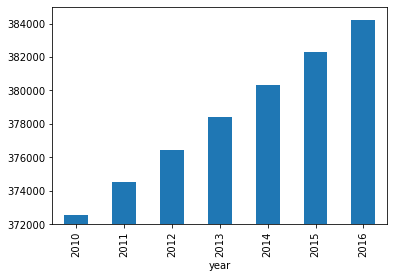

In [103]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data_mean.plot(kind='bar')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
sfo_data_mean.plot(kind='bar', ylim = (372000, 385000))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [73]:
# Calculate the average sale price per square foot and average gross rent
sfo_data_saleprice_rent = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
sfo_data_saleprice_rent.to_csv('sfo_data_saleprice_rent.csv')
sfo_data_saleprice_rent.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0


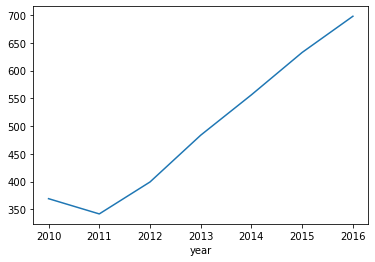

In [74]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
chart_ppsqf = sfo_data_saleprice_rent["sale_price_sqr_foot"].plot.line()

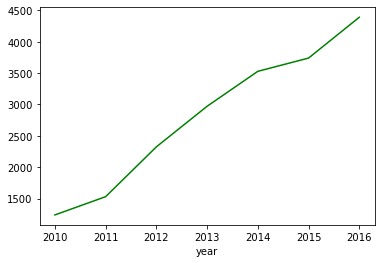

In [75]:
# Line chart for average montly rent
chart_amr = sfo_data_saleprice_rent["gross_rent"].plot.line(color='green')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [76]:
# Group by year and neighborhood and then create a new dataframe of the mean values
year_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
year_neighborhood.to_csv('year_neighborhood.csv')
year_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945       372560.0      1239.0
     Anza Vista                 267.932583       372560.0      1239.0
     Bayview                    170.098665       372560.0      1239.0
     Buena Vista Park           347.394919       372560.0      1239.0
     Central Richmond           319.027623       372560.0      1239.0

In [77]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
fig = year_neighborhood.hvplot.line(x='year', xlabel="Year", y='sale_price_sqr_foot',ylabel = "Sale Price per Sq Ft", groupby='neighborhood')
display(fig)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [78]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
year_neighborhood.hvplot.line(x='year', xlabel="Year", y='gross_rent',ylabel = "Gross Rent", groupby='neighborhood')


:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [79]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10 = sfo_data.reset_index()
group_neighborhood = top_10.groupby(["neighborhood"]).mean()
top_10_sorted = group_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10_sorted.to_csv('top_10_sorted.csv')
top_10_sorted.head(10)

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Union Square District,2012.500000,903.993258,377427.50,2555.166667
Merced Heights,2014.000000,788.844818,380348.00,3414.000000
Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
Westwood Park,2015.000000,687.087575,382295.00,3959.000000
Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
Potrero Hill,2013.000000,662.013613,378401.00,2817.285714


<AxesSubplot:xlabel='neighborhood'>

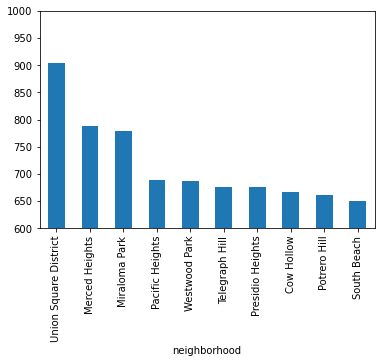

In [80]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_sorted['sale_price_sqr_foot'].plot(kind='bar', ylim = (600, 1000))

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [81]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
top_10_sorted.head()

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Union Square District,2012.50,903.993258,377427.50,2555.166667
Merced Heights,2014.00,788.844818,380348.00,3414.000000
Miraloma Park,2011.75,779.810842,375967.25,2155.250000
Pacific Heights,2013.00,689.555817,378401.00,2817.285714
Westwood Park,2015.00,687.087575,382295.00,3959.000000


<AxesSubplot:xlabel='neighborhood'>

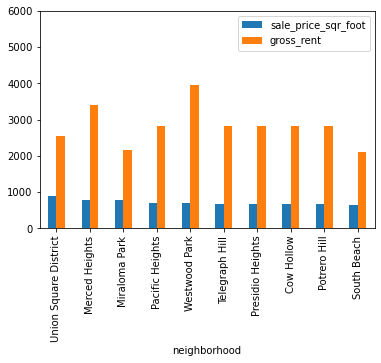

In [82]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_sorted[['sale_price_sqr_foot', 'gross_rent']].plot(kind='bar', ylim = (0, 6000))

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [83]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
neighborhoods_coordinates_data = pd.read_csv(file_path)
neighborhoods_coordinates_data.set_index('Neighborhood', inplace=True)
neighborhoods_coordinates_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [84]:
# Calculate the mean values for each neighborhood
sfo_data_mean = sfo_data.groupby('neighborhood').mean()
sfo_data_mean.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [85]:
# Join the average values with the neighborhood locations
combined_df = pd.concat([sfo_data_mean, neighborhoods_coordinates_data], join='inner', axis=1)
combined_df.to_csv('combined_df.csv')
combined_df.head()

,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

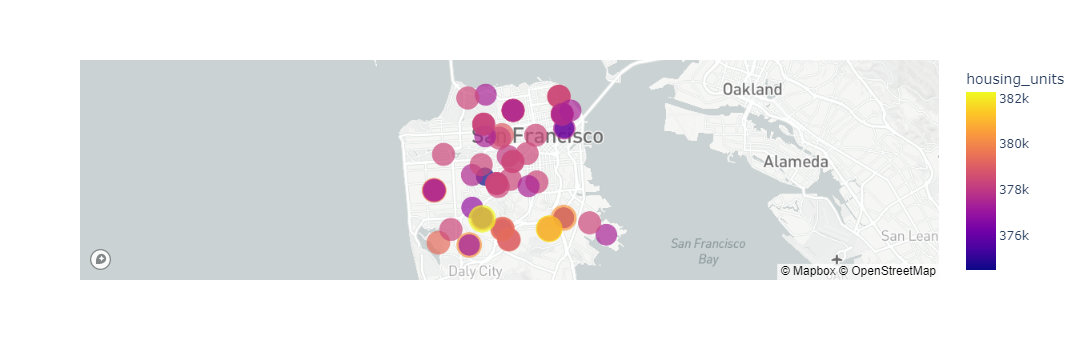

In [86]:
# Set the mapbox access token
load_dotenv('../keys.env')
map_box_api = os.getenv('mapbox')
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info

map_plot = px.scatter_mapbox(combined_df, lat="Lat", lon="Lon", size="gross_rent", color="housing_units", zoom=10)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [87]:
# Fetch the data from all expensive neighborhoods per year.
df_most_expensive = top_10_sorted.reset_index()
df_most_expensive.to_csv('df_most_expensive.csv')
df_most_expensive

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,2012.500000,903.993258,377427.50,2555.166667
1,Merced Heights,2014.000000,788.844818,380348.00,3414.000000
2,Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
3,Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
4,Westwood Park,2015.000000,687.087575,382295.00,3959.000000
5,Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
6,Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
7,Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
8,Potrero Hill,2013.000000,662.013613,378401.00,2817.285714
9,South Beach,2011.666667,650.124479,375805.00,2099.000000


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


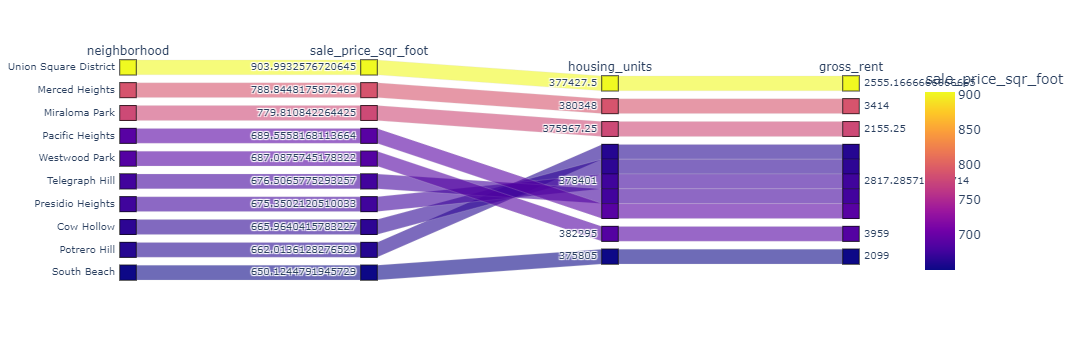

In [88]:
# Parallel Categories Plot
px.parallel_categories(df_most_expensive, dimensions =['neighborhood','sale_price_sqr_foot', 'housing_units', 'gross_rent'], color ='sale_price_sqr_foot')

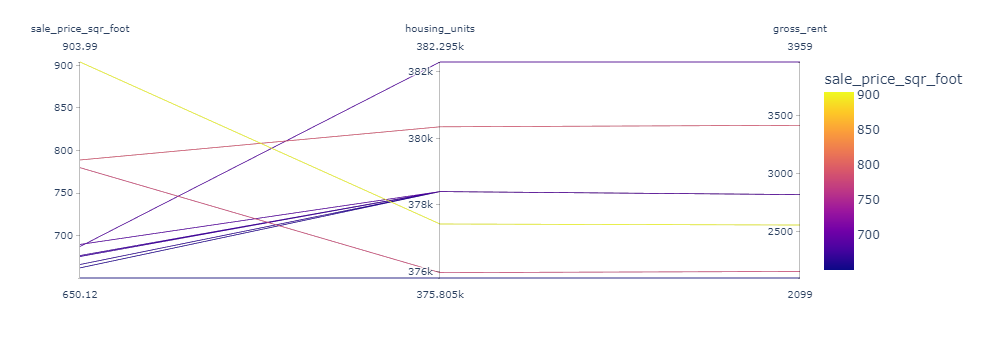

In [89]:
# Parallel Coordinates Plot
px.parallel_coordinates(df_most_expensive, dimensions =['neighborhood','sale_price_sqr_foot', 'housing_units', 'gross_rent'], color ='sale_price_sqr_foot')

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

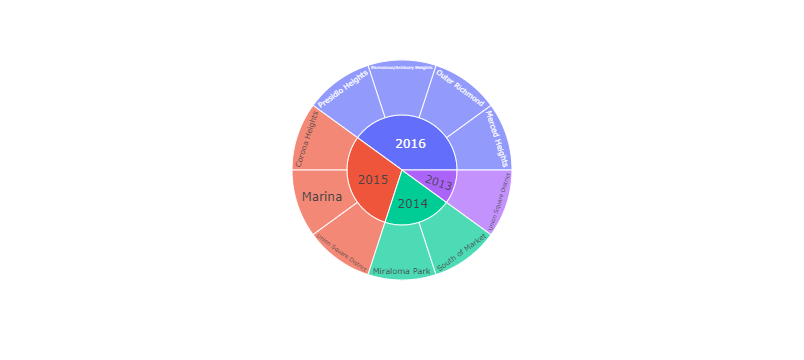

In [91]:
# Sunburst Plot
year_reset = year_neighborhood.reset_index()
year_sorted =year_reset.sort_values(by='sale_price_sqr_foot', ascending=False)
year_top10 = year_sorted.head(10)
year_top10.to_csv('year_top10.csv')
px.sunburst(year_top10, path=['year', 'neighborhood'])